In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir('C:\\Users\\DELL\\Desktop\\Interview Notes\\Python Power BI& ML Projects\\Billionaires_Analysis_with_Python-main\\')

In [4]:
billion = pd.read_csv('The Worlds Billionaires Dataset 1987-2022.csv',encoding='unicode_escape')
billion.head()

,Year,Yearly ranking,Name,Net worth (USD)\n(billion),Age,Nationality,Source(s) of wealth
0,2022,1,Elon Musk,$219 billion,50,United States,"Tesla, SpaceX"
1,2022,2,Jeff Bezos,$177 billion,58,United States,Amazon
2,2022,3,Bernard Arnault & family,$158 billion,73,France,LVMH
3,2022,4,Bill Gates,$129 billion,66,United States,Microsoft
4,2022,5,Warren Buffett,$118 billion,91,United States,Berkshire Hathaway


In [5]:
billion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       362 non-null    int64 
 1   Yearly ranking             362 non-null    object
 2   Name                       362 non-null    object
 3   Net worth (USD)
(billion)  362 non-null    object
 4   Age                        362 non-null    object
 5   Nationality                362 non-null    object
 6   Source(s) of wealth        362 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.9+ KB


In [6]:
billion.tail()

,Year,Yearly ranking,Name,Net worth (USD)\n(billion),Age,Nationality,Source(s) of wealth
357,1987,6,Hans and Gad Rausing,$6.0 billion,/,Sweden,/
358,1987,7,Paul Reichmann,$6.0 billion,/,Canada,/
359,1987,8,Yohachiro Iwasaki [ja],$5.6 billion,/,Japan,/
360,1987,9,Kenneth Thomson,$5.4 billion,/,Canada,/
361,1987,10,Keizo Saji,$4.0 billion,/,Japan,/


In [13]:
billion.columns = ['year', 'ranking', 'name', 'net_worth', 'age', 'nationality', 'source']

In [14]:
billion.columns

Index(['year', 'ranking', 'name', 'net_worth', 'age', 'nationality', 'source'], dtype='object')

In [15]:
billion.describe()

,year,age
count,362.000000,265.000000
mean,2004.486188,65.128302
std,10.375823,14.248822
min,1987.000000,31.000000
25%,1996.000000,54.000000
50%,2004.000000,66.000000
75%,2013.000000,77.000000
max,2022.000000,94.000000


In [18]:
billion.age = billion.age.str.strip()
billion.age = pd.to_numeric(billion.age, errors='coerce')

AttributeError: Can only use .str accessor with string values!

In [19]:
billion.ranking = billion.ranking.str.strip()
billion.ranking = pd.to_numeric(billion.ranking, errors='coerce')

In [20]:
billion.net_worth.head()

0    $219 billion 
1    $177 billion 
2    $158 billion 
3    $129 billion 
4    $118 billion 
Name: net_worth, dtype: object

In [21]:
billion.net_worth = billion.net_worth.str.replace(r'^\D+', '', regex=True)
billion.net_worth = billion.net_worth.str.replace(r'\D+$', '', regex=True)

In [22]:
billion.net_worth = billion.net_worth.str.strip()
billion.net_worth = pd.to_numeric(billion.net_worth, errors='coerce')

In [23]:
billion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         362 non-null    int64  
 1   ranking      362 non-null    int64  
 2   name         362 non-null    object 
 3   net_worth    362 non-null    float64
 4   age          265 non-null    float64
 5   nationality  362 non-null    object 
 6   source       362 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 19.9+ KB


In [24]:
billion.net_worth.head()

0    219.0
1    177.0
2    158.0
3    129.0
4    118.0
Name: net_worth, dtype: float64

In [25]:
billion.net_worth = billion.net_worth * 1e9

In [26]:
billion.source = billion.source.replace('/', np.nan)

In [27]:
billion.isna().sum()

year            0
ranking         0
name            0
net_worth       0
age            97
nationality     0
source         90
dtype: int64

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [29]:
billion.describe(include='all')

,year,ranking,name,net_worth,age,nationality,source
count,362.000000,362.000000,362,3.620000e+02,265.000000,362,272
unique,NaN,NaN,88,NaN,NaN,17,53
top,NaN,NaN,Bill Gates,NaN,NaN,United States,Microsoft
freq,NaN,NaN,31,NaN,NaN,185,39
mean,2004.486188,5.439227,NaN,3.576409e+10,65.128302,NaN,NaN
std,10.375823,2.820170,NaN,3.186351e+10,14.248822,NaN,NaN
min,1987.000000,1.000000,NaN,4.000000e+09,31.000000,NaN,NaN
25%,1996.000000,3.000000,NaN,1.350000e+10,54.000000,NaN,NaN
50%,2004.000000,6.000000,NaN,2.500000e+10,66.000000,NaN,NaN
75%,2013.000000,8.000000,NaN,5.000000e+10,77.000000,NaN,NaN


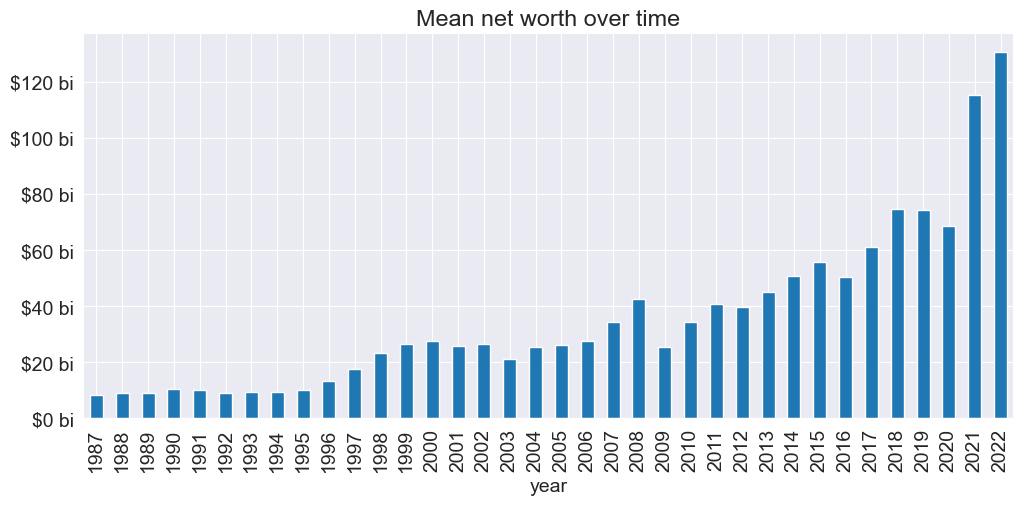

In [30]:
# Ploting directly through pandas and assigning it to an axis variable for further customization
ax = billion.groupby('year')['net_worth'].mean().plot(kind='bar', title='Mean net worth over time', figsize=(12,5))

# Function for formating the y label of the plot to make it more readable
billions = lambda x, pos: '${:.0f} bi'.format(x*1e-9)

# Instantiate it as a FuncFormatter to use it in the set_major_formatter method
formatter = plt.FuncFormatter(billions)  
ax.yaxis.set_major_formatter(formatter)

In [31]:
billion.query("net_worth == net_worth.max()")

,year,ranking,name,net_worth,age,nationality,source
0,2022,1,Elon Musk,2.190000e+11,50.0,United States,"Tesla, SpaceX"


In [32]:
billion.query("net_worth == net_worth.min()")

,year,ranking,name,net_worth,age,nationality,source
361,1987,10,Keizo Saji,4.000000e+09,NaN,Japan,NaN


In [33]:
billion.query("age == age.max()")

,year,ranking,name,net_worth,age,nationality,source
248,1998,7,Forrest Mars Sr. & family,1.350000e+10,94.0,United States,"Mars, Inc.[49]"


In [34]:
billion.query("age == age.min()")

,year,ranking,name,net_worth,age,nationality,source
65,2016,6,Mark Zuckerberg,4.460000e+10,31.0,United States,"Facebook, Inc."


In [35]:
billion.query("year == 2022")

,year,ranking,name,net_worth,age,nationality,source
0,2022,1,Elon Musk,2.190000e+11,50.0,United States,"Tesla, SpaceX"
1,2022,2,Jeff Bezos,1.770000e+11,58.0,United States,Amazon
2,2022,3,Bernard Arnault & family,1.580000e+11,73.0,France,LVMH
3,2022,4,Bill Gates,1.290000e+11,66.0,United States,Microsoft
4,2022,5,Warren Buffett,1.180000e+11,91.0,United States,Berkshire Hathaway
5,2022,6,Larry Page,1.110000e+11,49.0,United States,Alphabet Inc.
6,2022,7,Sergey Brin,1.070000e+11,48.0,United States,Alphabet Inc.
7,2022,8,Larry Ellison,1.060000e+11,77.0,United States,Oracle Corporation
8,2022,9,Steve Ballmer,9.140000e+10,66.0,United States,Microsoft
9,2022,10,Mukesh Ambani,9.070000e+10,64.0,India,Reliance Industries


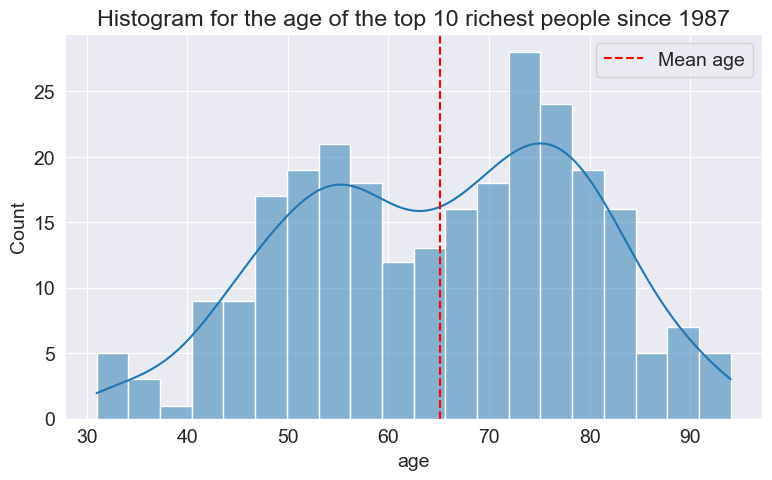

In [36]:
ax = sns.histplot(data=billion, x='age', bins=20, kde=True)
ax.set_title('Histogram for the age of the top 10 richest people since 1987')
ax.axvline(x=billion.age.mean(), color='r', linestyle='--', label='Mean age')
ax.legend();

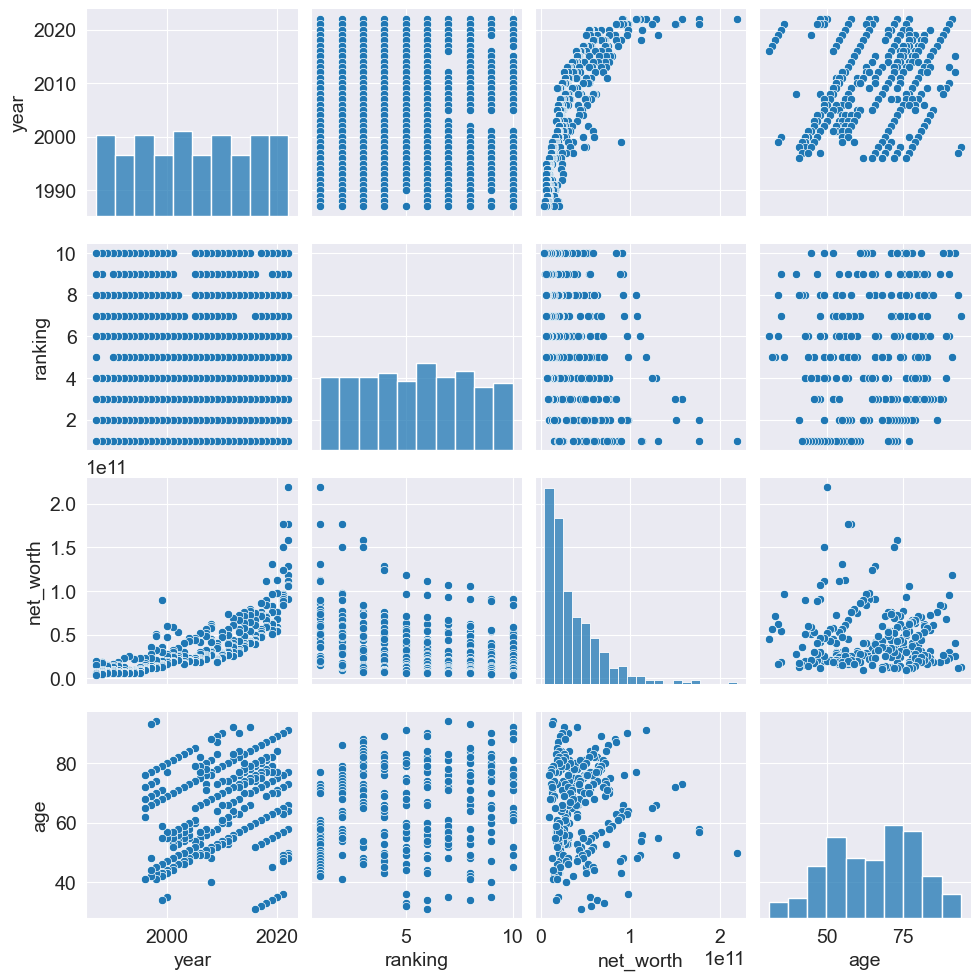

In [37]:
sns.pairplot(data=billion);

In [38]:
n = billion.groupby('year')['nationality'].value_counts()\
                                          .rename('n_count')\
                                          .reset_index()

In [39]:
n = n.drop(index=n.query("n_count == 1").index)

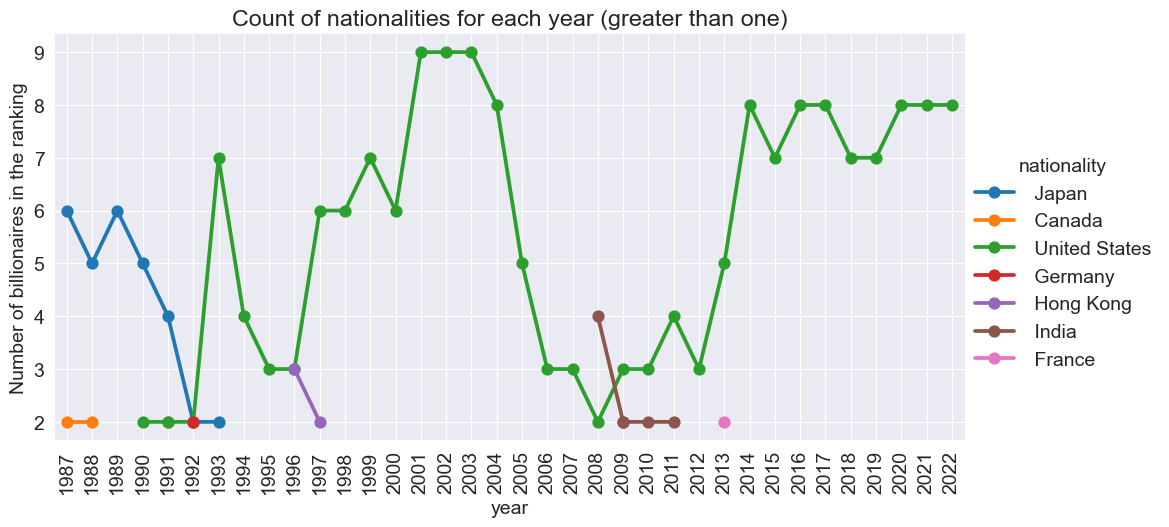

In [40]:
sns.catplot(data=n, x='year', y='n_count', hue='nationality', kind='point', aspect=2)
plt.xticks(rotation=90)
plt.grid(visible=True)
plt.title("Count of nationalities for each year (greater than one)")
plt.ylabel('Number of billionaires in the ranking');

In [41]:
top_source = billion.groupby(by='year', as_index=False).agg({'net_worth': 'max', 'source': 'first'}).dropna()
top_source.head()

,year,net_worth,source
9,1996,2.290000e+10,Wal-Mart
10,1997,3.640000e+10,Microsoft
11,1998,5.100000e+10,Microsoft
12,1999,9.000000e+10,Microsoft
13,2000,6.000000e+10,Microsoft


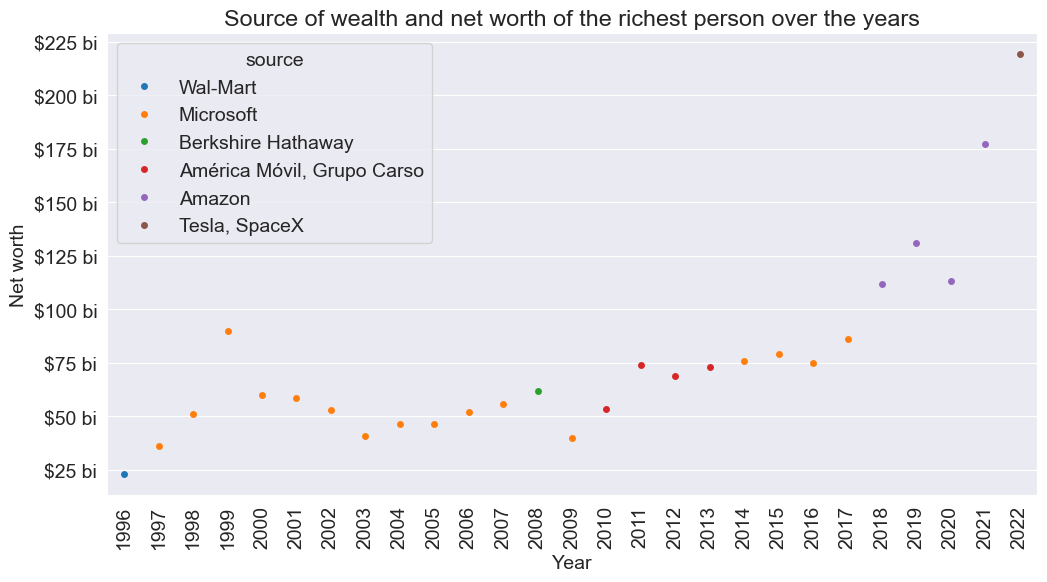

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
sns.stripplot(data=top_source, x='year', y='net_worth', hue='source', ax=ax)
 
ax.yaxis.set_major_formatter(formatter)

ax.set(title='Source of wealth and net worth of the richest person over the years',
      xlabel='Year', ylabel='Net worth')

plt.xticks(rotation=90);

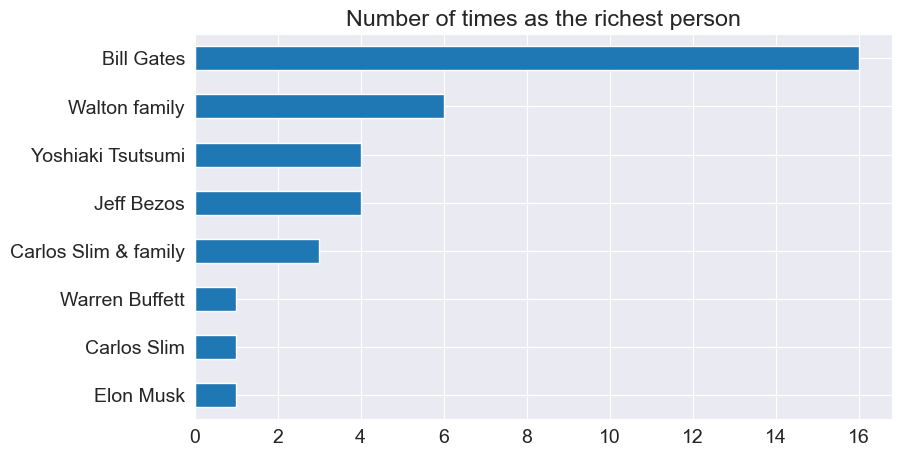

In [43]:
billion.query("ranking == 1").name.value_counts() \
                             .sort_values() \
                             .plot(kind='barh', title='Number of times as the richest person');

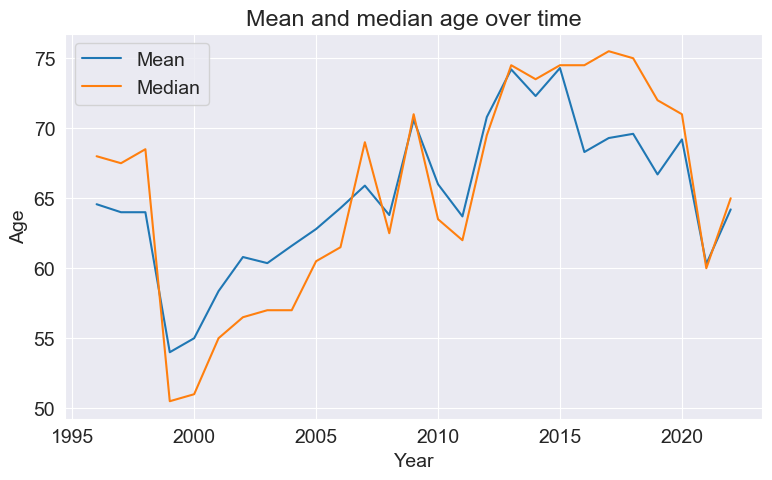

In [44]:
ax = billion.groupby('year').agg({'age': ['mean', 'median']}).dropna().plot()
ax.legend(labels=['Mean', 'Median'])
ax.set(title='Mean and median age over time', xlabel='Year', ylabel='Age');

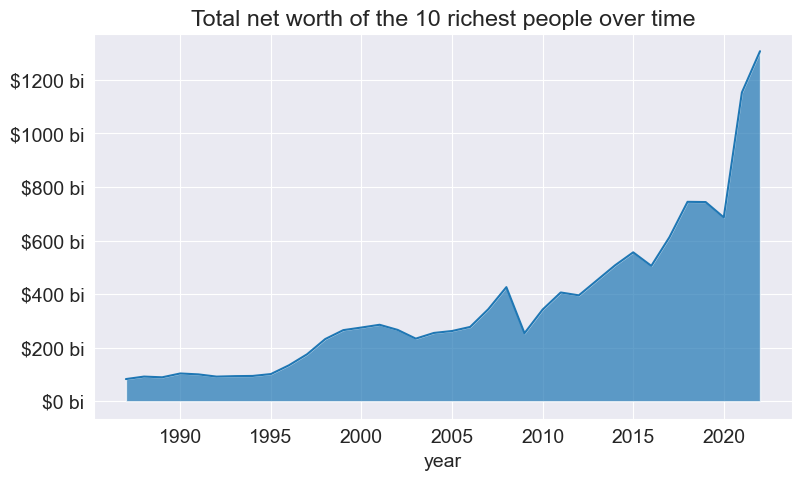

In [45]:
total_nw = billion.groupby('year')['net_worth'].sum()
ax = total_nw.plot()  
ax.yaxis.set_major_formatter(formatter)
ax.fill_between(x=total_nw.index, y1=total_nw, alpha=0.7)
ax.set_title('Total net worth of the 10 richest people over time');